In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
import taxis
from utils import *
from visualize import *
from sklearn.linear_model import *
from sklearn.kernel_ridge import *
from sklearn.pipeline import *
from sklearn.preprocessing import *
from datetime import datetime
from sklearn.cluster import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.neighbors import *
from matplotlib import cm

DBNAME="../taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952

holidays=['20170626']
def peak(h,m,w):
    return 1 if ((w==1 and (h>=6 and (h <=9 and m<30)) or (h >= 18))) else 0

def weekday(d):
    dt=datetime.strptime(d,"%Y%m%d")
    return 1 if datetime.isoweekday(dt)<6 else 0


In [2]:
dates=taxis.get_dates(DBNAME)
dates=[str(x[0]) for x in dates]
dates


['20170624',
 '20170625',
 '20170626',
 '20170627',
 '20170628',
 '20170629',
 '20170630',
 '20170701',
 '20170702',
 '20170703',
 '20170704',
 '20170705',
 '20170706',
 '20170707',
 '20170708']

In [22]:
def process_date(date):
    if weekday(date)==0:
        return None
    df=taxis.getdf_date(DBNAME,date)
    df['Date']=date
    df['Hour']=df.apply(lambda r:int(r['Time'][:2]),axis=1)
    df['Minute']=df.apply(lambda r:int(r['Time'][2:]),axis=1)
    df['Weekday']=df.apply(lambda r: weekday(r['Date']),axis=1)
    df['Holiday']=df.apply(lambda r: 1 if r['Date'] in holidays else 0,axis=1)
    df['PeakHour']=df.apply(lambda r: peak(r['Hour'],r['Minute'],r['Weekday']),axis=1)
    df=df.query('(Hour>=6 and Hour<=12) and Weekday==1')[['X','Y','Hour','Minute','PeakHour','TaxiCount']]
    print df.head()
    return df


In [23]:
data=[process_date(date) for date in dates]
data=[x for x in data if x is not None]

       X  Y  Hour  Minute  PeakHour  TaxiCount
57456  0  0     6       0         1          0
57457  1  0     6       0         1          0
57458  2  0     6       0         1          0
57459  3  0     6       0         1          0
57460  4  0     6       0         1          0
       X  Y  Hour  Minute  PeakHour  TaxiCount
56658  0  0     6       0         1          0
56659  1  0     6       0         1          0
56660  2  0     6       0         1          0
56661  3  0     6       0         1          0
56662  4  0     6       0         1          0
       X  Y  Hour  Minute  PeakHour  TaxiCount
57456  0  0     6       0         1          0
57457  1  0     6       0         1          0
57458  2  0     6       0         1          0
57459  3  0     6       0         1          0
57460  4  0     6       0         1          0
       X  Y  Hour  Minute  PeakHour  TaxiCount
57456  0  0     6       0         1          0
57457  1  0     6       0         1          0
57458  2  0  

In [24]:
rf=RandomForestRegressor(n_estimators=100,criterion='mse',oob_score=True,n_jobs=5,warm_start=True)
for df in data[:-1]:
    print df.describe()
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    rf.fit(X,y)
    print rf.score(X,y)

                  X             Y          Hour        Minute      PeakHour  \
count  67032.000000  67032.000000  67032.000000  67032.000000  67032.000000   
mean      18.500000     10.000000      9.000000     27.500000      0.285714   
std       10.965938      6.055346      2.000015     17.260391      0.451757   
min        0.000000      0.000000      6.000000      0.000000      0.000000   
25%        9.000000      5.000000      7.000000     13.750000      0.000000   
50%       18.500000     10.000000      9.000000     27.500000      0.000000   
75%       28.000000     15.000000     11.000000     41.250000      1.000000   
max       37.000000     20.000000     12.000000     55.000000      1.000000   

          TaxiCount  
count  67032.000000  
mean       5.880326  
std       15.019123  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        3.000000  
max      251.000000  


/Users/hari/python/py2/taxidata/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.995142383977
                  X             Y          Hour        Minute      PeakHour  \
count  67032.000000  67032.000000  67032.000000  67032.000000  67032.000000   
mean      18.500000     10.000000      9.000000     27.500000      0.285714   
std       10.965938      6.055346      2.000015     17.260391      0.451757   
min        0.000000      0.000000      6.000000      0.000000      0.000000   
25%        9.000000      5.000000      7.000000     13.750000      0.000000   
50%       18.500000     10.000000      9.000000     27.500000      0.000000   
75%       28.000000     15.000000     11.000000     41.250000      1.000000   
max       37.000000     20.000000     12.000000     55.000000      1.000000   

          TaxiCount  
count  67032.000000  
mean       5.348759  
std       14.780221  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        3.000000  
max      228.000000  
0.549046030466
                  X             Y          Hour        Minut

                  X             Y          Hour        Minute      PeakHour  \
count  67032.000000  67032.000000  67032.000000  67032.000000  67032.000000   
mean      18.500000     10.000000      9.000000     27.500000      0.285714   
std       10.965938      6.055346      2.000015     17.260391      0.451757   
min        0.000000      0.000000      6.000000      0.000000      0.000000   
25%        9.000000      5.000000      7.000000     13.750000      0.000000   
50%       18.500000     10.000000      9.000000     27.500000      0.000000   
75%       28.000000     15.000000     11.000000     41.250000      1.000000   
max       37.000000     20.000000     12.000000     55.000000      1.000000   

          TaxiCount  
count  67032.000000  
mean       5.443236  
std       16.000014  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        3.000000  
max      267.000000  


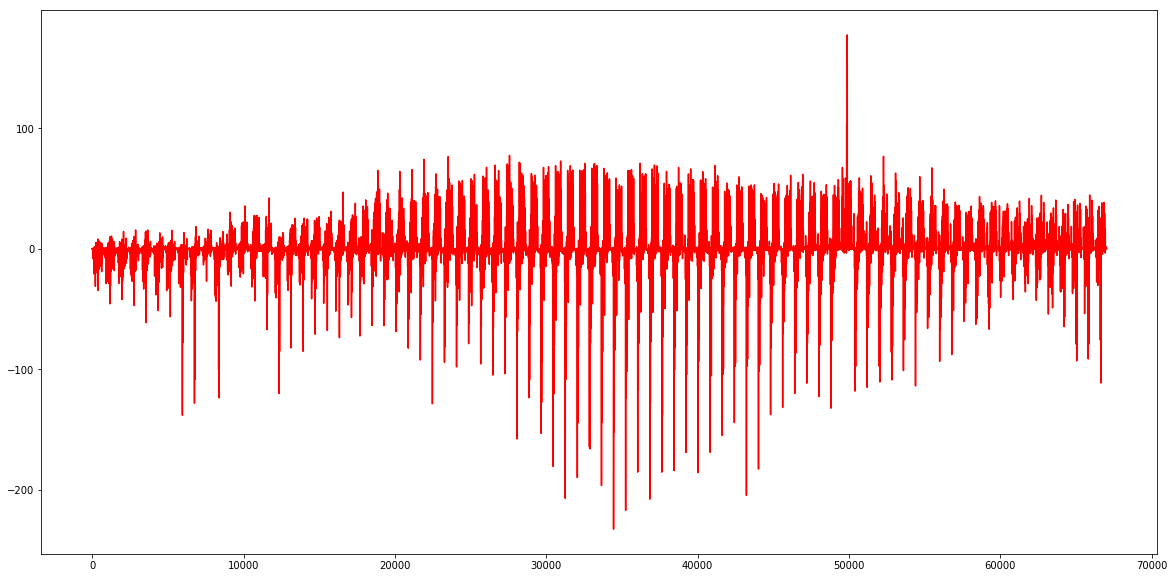

In [26]:
test=data[-1]

print test.describe()

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)
P=rf.predict(Xt)
e=[x-y for x,y in zip(P,yt)]


#plt.plot(yt,'-g')
#plt.plot(P,'-b')
plt.plot(e,'-r')
plt.show()